In [1]:
# imports
import pandas as pd
import pymc3 as pm
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
# generate the data
data = np.random.beta(3,1.5,1000)
data[:5]

array([ 0.84118788,  0.51372451,  0.86608846,  0.50991728,  0.56168159])

(array([  2.,   0.,   2.,   4.,   0.,   4.,   4.,   4.,   2.,   6.,   6.,
          6.,   9.,  13.,  19.,  16.,  18.,  13.,  18.,  17.,  25.,  17.,
         27.,  25.,  28.,  25.,  27.,  39.,  25.,  23.,  20.,  19.,  29.,
         33.,  24.,  41.,  37.,  24.,  27.,  39.,  21.,  39.,  37.,  44.,
         31.,  31.,  18.,  24.,  18.,  20.]),
 array([ 0.07043432,  0.08892737,  0.10742041,  0.12591346,  0.1444065 ,
         0.16289954,  0.18139259,  0.19988563,  0.21837868,  0.23687172,
         0.25536477,  0.27385781,  0.29235085,  0.3108439 ,  0.32933694,
         0.34782999,  0.36632303,  0.38481608,  0.40330912,  0.42180216,
         0.44029521,  0.45878825,  0.4772813 ,  0.49577434,  0.51426739,
         0.53276043,  0.55125348,  0.56974652,  0.58823956,  0.60673261,
         0.62522565,  0.6437187 ,  0.66221174,  0.68070479,  0.69919783,
         0.71769087,  0.73618392,  0.75467696,  0.77317001,  0.79166305,
         0.8101561 ,  0.82864914,  0.84714218,  0.86563523,  0.88412827,
 

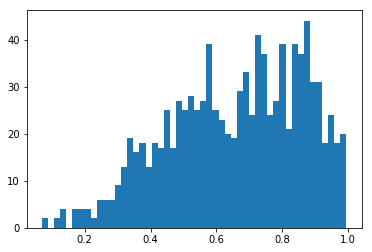

In [3]:
plt.hist(data, 50)

In [111]:
data = data[0:5]

## Define my prior

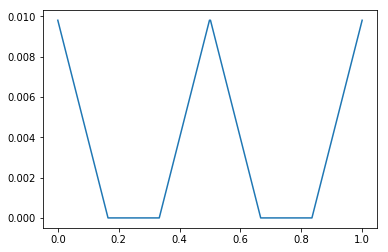

In [118]:
dataVector = list(reversed(range(51))) + \
            [0]*50 + \
            list(range(51)) + \
            list(reversed(range(51))) + \
            [0]*50 + \
            list((range(51)))
            
# convert to probability dist
pTheta = dataVector / np.sum(dataVector)

#plot pdf
plt.plot(np.linspace(0,1,len(pTheta)), pTheta)
plt.show()

In [99]:
# define the prior
import theano as tt

def logp(value):
    if value > len(pTheta) or value < 0 :
        return 0
    else:
        return tt.log(pTheta(int(value)))

In [116]:
# define the prior as a distribution
def myDist(value):
    import math 
    # make shape of probability dist
    pTheta = list(reversed(range(51))) + \
                [1]*50 + \
                list((range(51))) + \
                list(reversed(range(51))) + \
                [1]*50 + \
                list((range(51)))
    # convert to probability dist
    p = np.array(pTheta)
    pTheta = p / sum(p)
    #return np.log(pTheta[int(len(pTheta)*value)])
    return -math.log(pTheta[value])

In [117]:
with pm.Model() as model:
    #prior
    theta = pm.DensityDist('theta', myDist)
    
    #liklihood
    likelihood = pm.Beta('likelihood', 0.3, 1.5 ,observed=data)
    
    start = pm.find_MAP()
    #step = pm.Metropolis()
    #trace = pm.sample(2000, step, start=start, progressbar=True)

IndexError: only integers, slices (`:`), ellipsis (`...`), numpy.newaxis (`None`) and integer or boolean arrays are valid indices

In [109]:
with pm.Model() as model:
    #prior
    p = pm.Beta('p', 3, 1.5)
    
    #liklihood
    likelihood = pm.Beta('likelihood', 0.3, 1.5 ,observed=data)
    
    start = pm.find_MAP()
    step = pm.Metropolis()
    trace = pm.sample(2000, step, start=start, progressbar=True)

Optimization terminated successfully.
         Current function value: 7.705058
         Iterations: 0
         Function evaluations: 1
         Gradient evaluations: 1


100%|██████████| 2500/2500 [00:00<00:00, 4812.73it/s]


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f9e833c9be0>,
        <matplotlib.axes._subplots.AxesSubplot object at 0x7f9e84a91860>]], dtype=object)

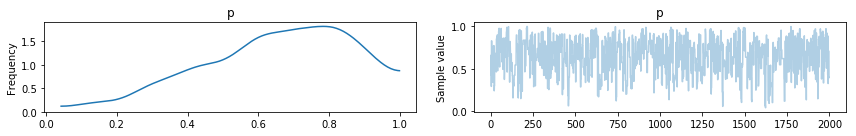

In [17]:
pm.traceplot(trace, varnames=['p'])#, lines={'p': freq_results['x']})

In [19]:
pm.summary(trace)#.round(2)


p:

  Mean             SD               MC Error         95% HPD interval
  -------------------------------------------------------------------
  
  0.646            0.207            0.009            [0.264, 0.987]

  Posterior quantiles:
  2.5            25             50             75             97.5
  |--------------|==============|==============|--------------|
  
  0.187          0.506          0.675          0.813          0.968



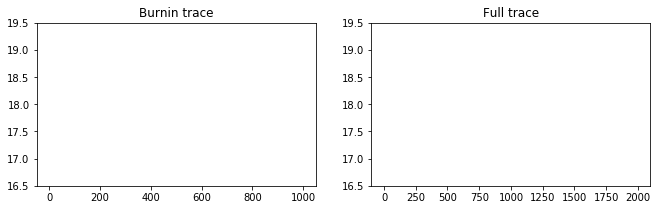

In [9]:
fig = plt.figure(figsize=(11,3))
plt.subplot(121)
_ = plt.title('Burnin trace')
_ = plt.ylim(ymin=16.5, ymax=19.5)
_ = plt.plot(trace.get_values('p')[:1000])
fig = plt.subplot(122)
_ = plt.title('Full trace')
_ = plt.ylim(ymin=16.5, ymax=19.5)
_ = plt.plot(trace.get_values('p'))

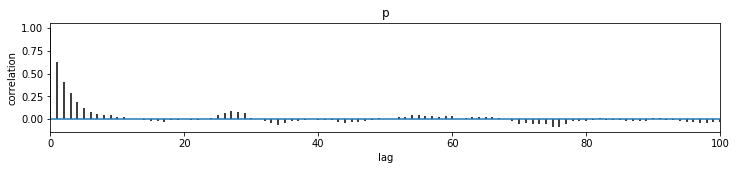

In [10]:
_ = pm.autocorrplot(trace[:2000], varnames=['p'])